In [1]:
%load_ext autoreload
%autoreload 2
from utils import *
from KeywordExtractor import *
from gensim.models import Word2Vec
import networkx as nx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
#prune_text("aaa bbbb ccc")
abstract = load_abstract('ex1')
abstract = "The country of Japan has developed to a great economy after WW1. Japan is a developed island nation. I fly. "
#abstract = "I like deep saying. I like NLP. I enjoy flying."
ke = KeywordExtractor(abstract=abstract)
print(ke.tokens)
print(ke.sentences)
print(ke.graph)
ke.graph.nodes

['country', 'japan', 'developed', 'great', 'economy', 'ww1', 'japan', 'developed', 'island', 'nation', 'fly']
[['country', 'japan', 'developed', 'great', 'economy', 'ww1'], ['japan', 'developed', 'island', 'nation'], ['fly']]
Graph with 9 nodes and 13 edges


NodeView(('nation', 'great', 'country', 'economy', 'island', 'fly', 'ww1', 'japan', 'developed'))

{('country', 'japan'): 1, ('country', 'developed'): 1, ('developed', 'japan'): 3, ('great', 'japan'): 1, ('developed', 'great'): 2, ('developed', 'economy'): 1, ('economy', 'great'): 2, ('great', 'ww1'): 1, ('economy', 'ww1'): 1, ('island', 'japan'): 1, ('developed', 'island'): 3, ('developed', 'nation'): 2, ('island', 'nation'): 2}
[('nation', 'developed'), ('nation', 'island'), ('great', 'japan'), ('great', 'developed'), ('great', 'economy'), ('great', 'ww1'), ('country', 'japan'), ('country', 'developed'), ('economy', 'developed'), ('economy', 'ww1'), ('island', 'japan'), ('island', 'developed'), ('japan', 'developed')]
{('nation', 'developed'): 2, ('nation', 'island'): 2, ('great', 'japan'): 1, ('great', 'developed'): 2, ('great', 'economy'): 2, ('great', 'ww1'): 1, ('country', 'japan'): 1, ('country', 'developed'): 1, ('economy', 'developed'): 1, ('economy', 'ww1'): 1, ('island', 'japan'): 1, ('island', 'developed'): 3, ('japan', 'developed'): 3}


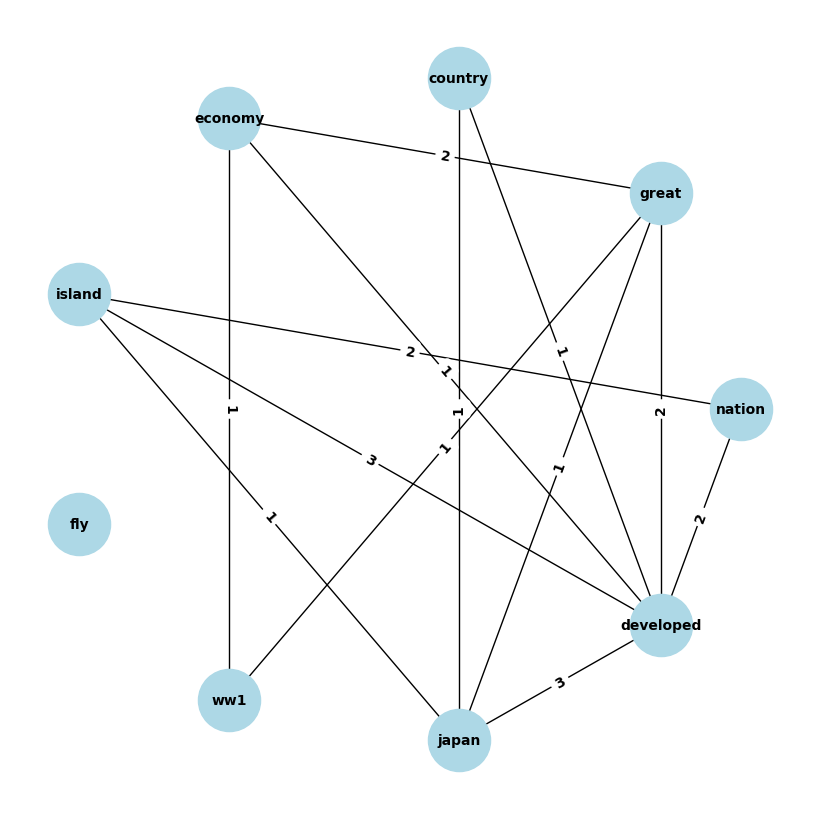

In [22]:
print(ke.co)
labels = nx.get_edge_attributes(ke.graph,'weight')
print(ke.graph.edges)
print(labels)
ke.visualize_graph()